## 人工智能编程基础（试学班）

## 项目：我的微信好友

在这个notebook文件中，有些模板代码已经提供给你，但你还需要实现更多的功能来完成这个项目。除非有明确要求，你无须修改任何已给出的代码。以**'(练习)'**开始的标题表示接下来的代码部分中有你需要实现的功能。这些部分都配有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示。

除了实现代码外，你还**需要**回答一些与项目及代码相关的问题。每个需要回答的问题都会以 **'问题 X'** 标记。请仔细阅读每个问题，并且在问题后的 **'回答'** 部分写出完整的答案。我们将根据 你对问题的回答 和 撰写代码实现的功能 来对你提交的项目进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

---

### 让我们开始吧

在这个项目中，你将通过开源的微信个人号接口 [itchat](http://itchat.readthedocs.io/zh/latest/) 来实现 Python 调用微信好友数据，并做一些有趣的统计和分析，最终分享给你的好友 :P

### 项目内容

我们将这个notebook分为不同的步骤，你将完成以下5个任务：

**任务0 - 登陆微信，并通过向文件传输助手发送打招呼信息**

**任务1 - 统计你的微信好友的男女比例**

**任务2 - 分析微信好友的地域分布**

**任务3 - 生成微信好友的签名词云图**

**任务4 - 对签名进行情感分析**

## 任务0. 登陆并发送打招呼信息

### 登陆
在这一个章节中，我们已经为你导入`itchat`这个包，并调用`login()`函数登陆网页微信，试试看运行以下代码，并扫描二维码以登陆网页微信。

In [3]:
### 以下内容无需改动，直接运行即可
# 导入项目中所需要的包
import itchat
import pandas as pd
import re
import os 
import numpy as np
import pinyin
import matplotlib.pyplot as plt
%matplotlib inline

print("所有库导入成功！")

/home/leesper/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


所有库导入成功！


In [4]:
# 调用login()函数以登录网页微信
itchat.login()

Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 东方甲乙木


### 打个招呼吧

在这个章节中，我们将调用`itchat`的`send()`函数向文件传输助手`filehelper`发送一个打招呼信息吧！

#### 练习: 
 - 将想要发送的信息内容赋值给`message`

In [5]:
### TODO：将信息内容赋值给message
message = 'hello, world'

In [6]:
### 以下内容无需改动，直接运行即可
# 发送消息
itchat.send(message, 'filehelper')

<ItchatReturnValue: {'BaseResponse': {'Ret': 0, 'ErrMsg': '请求成功', 'RawMsg': '请求成功'}, 'MsgID': '9100061872810697121', 'LocalID': '15300190989461'}>

打开手机微信端的文件传输助手，看看是否收到了这条信息，并回答以下问题。

**问题1**: message 的变量类型是什么？

**回答**：message的变量类型是字符串

## Task 1. 好友男女比例

In [7]:
### 以下内容无需改动，直接运行即可
dataset = itchat.get_friends(update=True)[0:]

根据我们希望探索的问题，需要从数据集中取出以下几个部分：
- NickName：微信昵称
- Sex：性别，1表示男性，2表示女性
- Province：省份
- City：城市
- Signature：微信签名

In [8]:
### 以下内容无需改动，直接运行即可
def preprocess_data(dataset):
    
    data = [{'NickName': item['NickName'], 
            'Sex': item['Sex'], 
            'Province': item['Province'], 
            'City': item['City'], 
            'Signature': item['Signature']} for item in dataset]
    
    return data

pre_data = preprocess_data(dataset)

#### 练习
* 打印`pre_data`的数据类型
* 打印`pre_data`中的第一条数据，以及其数据类型。
* 打印`pre_data`中第一条数据的微信昵称

In [9]:
### TODO：打印pre_data的数据类型
print(type(pre_data))

<class 'list'>


In [10]:
### TODO：打印第一条数据及数据类型
print(pre_data[0], type(pre_data[0]))

{'NickName': '东方甲乙木', 'Sex': 1, 'Province': '贵州', 'City': '贵阳', 'Signature': '执一不二，正心跬步；勇猛精进，热血千秋。'} <class 'dict'>


In [11]:
### TODO：打印第一条数据的微信昵称
print(pre_data[0]['NickName'])

东方甲乙木


Traceback (most recent call last):
  File "/home/leesper/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 601, in urlopen
    chunked=chunked)
  File "/home/leesper/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 387, in _make_request
    six.raise_from(e, None)
  File "<string>", line 2, in raise_from
  File "/home/leesper/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 383, in _make_request
    httplib_response = conn.getresponse()
  File "/home/leesper/anaconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/home/leesper/anaconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/home/leesper/anaconda3/lib/python3.6/http/client.py", line 266, in _read_status
    raise RemoteDisconnected("Remote end closed connection without"
http.client.RemoteDisconnected: Remote end closed connection without response

During handling 

**问题1**: pre_data的数据类型是什么？pre_data中第一条数据的数据类型呢？这两种数据类型的优缺点分别是什么？

回答：pre_data的数据类型是列表;pre_data中第一条数据的数据类型是字典；列表的优点是它是一种有序结构，占用的内存空间较少，缺点是插入，删除和查找的操作会随着元素的增加而增加;字典的优点在于插入和查找的速度很快，不会随着元素的增加而增加，缺点是占用的内存空间较大。

#### 练习：
- 统计好友性别，分为男性、女性与未知三种，赋值到已经定义好的`sex`字典中

提示：
- `pre_data`中1表示男性、2表示女性；
- 数据需要从第1条开始计算，因为第0条是自己。

In [13]:
# TODO：统计好友性别
sex = {
    'male': sum([1 if item['Sex'] == 1 else 0 for item in pre_data]),
    'female': sum([1 if item['Sex'] == 2 else 0 for item in pre_data]),
    'unknown': sum([1 if item['Sex'] not in [1, 2] else 0 for item in pre_data])
}

In [16]:
### 以下内容无需改动，直接运行即可
print("我的好友中共有", sex['male'],"位男性、", sex['female'], "位女性，", "有", sex['unknown'], "位好友未填写。")

我的好友中共有 306 位男性、 196 位女性， 有 35 位好友未填写。


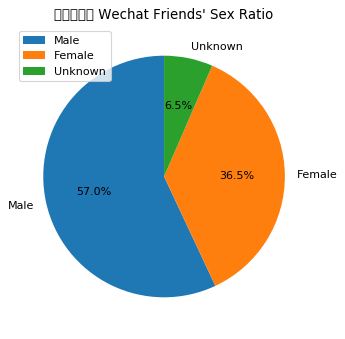

In [19]:
### 以下内容无需改动，直接运行即可
plt.figure(figsize=(8,5), dpi=80)
plt.axes(aspect=1) 
plt.pie([sex['male'], sex['female'], sex['unknown']],
        labels=['Male','Female','Unknown'],
        labeldistance = 1.1,
        autopct = '%3.1f%%',
        shadow = False,
        startangle = 90,
        pctdistance = 0.6 
)

plt.legend(loc='upper left',)
plt.title(u"%s Wechat Friends' Sex Ratio" % pre_data[0]['NickName'])
plt.show()

## Task 2. 好友地域分布
练习：
- 使用`list`中`append()`方法将好友省份添加至`province`中，注意要去除空的字符串

提示：可以用`for`循环实现

In [21]:
### TODO：将好友所在省份（不为空）添加到 province 中
province = []
for item in pre_data:
    if item['Province'] != '':
        province.append(item['Province'])

In [22]:
### 以下内容无需修改，直接运行即可
province = [pinyin.get(i, format="strip", delimiter="") for i in province if i != '']

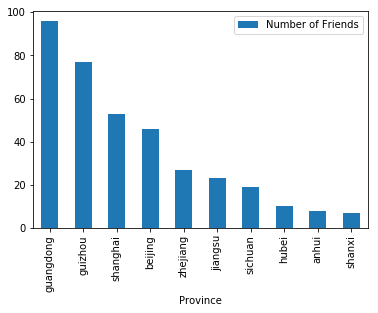

In [23]:
### 以下内容无需修改，直接运行即可
province = pd.DataFrame(province)
province.columns = ['Province']
province['Number of Friends'] = 1
province.groupby('Province').sum().sort_values('Number of Friends', ascending=False)[:10].plot.bar()

## Task 3. 生成好友个性签名词云图

练习：
* 使用`print()`语句打印出自己的个性签名

In [24]:
### TODO：打印自己的个性签名
print(pre_data[0]['Signature'])

执一不二，正心跬步；勇猛精进，热血千秋。


In [32]:
### 以下内容无需修改，直接运行即可
from wordcloud import WordCloud
import jieba

tList = []
for i in pre_data:
    signature = i["Signature"].replace(" ", "").replace("span", "").replace("class", "").replace("emoji", "")
    rep = re.compile("1f\d.+")
    signature = rep.sub("", signature)
    if len(signature) > 0:
        tList.append(signature)
    
text = "".join(tList)

wordlist_jieba = jieba.cut(text, cut_all=True)
wl_space_split = " ".join(wordlist_jieba)

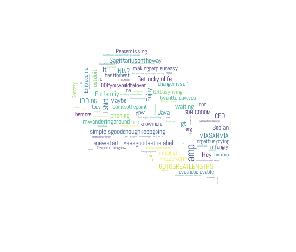

In [36]:
### 以下内容无需修改，直接运行即可
import PIL.Image as Image

alice_coloring = np.array(Image.open("wechat.jpg"))

my_wordcloud = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
                         max_font_size=40, random_state=42, font_path='./abel-regular.ttf').generate(wl_space_split)

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

d = os.path.dirname('.')
my_wordcloud.to_file(os.path.join(d, "wechatfriends_wordcloud.png"))

## Task 4. 对好友签名进行情感分析

在这部分内容中，我们调用了[SnowNLP](https://github.com/isnowfy/snownlp)的情感分析，它是一个python写的类库，可以方便的处理中文文本内容，不用我们实现其中具体的代码。

在这里，我们希望了解到好友签名所表达出来的情感是积极的，还是中立、负面的，比如说在以下例子中，我们对"这个商品我非常喜欢，颜色很合我意！"这句话进行了预处理，并通过训练好的模型预测其的情感。

在这里，我们简单地假设大于0.66表示积极，低于0.33表示消极，其他表示中立。

运行以下代码试试看！

In [37]:
### 以下内容无需修改，直接运行即可
from snownlp import SnowNLP

text = "这个商品我非常喜欢，颜色很合我意！"
sentiment = SnowNLP(text).sentiments

print(sentiment)

0.6851400314498396


接下来，我们将好友的签名进行文本预处理，并尝试统计其中积极、中立、消极的个数。

练习：
* 统计sentiments中大于0.66的个数
* 统计sentiments中大于等于0.33且小于等于0.66的个数
* 统计sentiments中小于0.33的个数

提示：可以用循环语句或者列表表达式实现。

In [38]:
### 以下内容无需修改，直接运行即可
setiments = []
for i in tList:
    setiments.append(SnowNLP(i).sentiments) 

In [39]:
### TODO：统计sentiments中大于0.66的个数
positive = sum([1 for setiment in setiments if setiment > 0.66])

### TODO：统计sentiments中大于等于0.33且小于等于0.66的个数
neutral = sum([1 for setiment in setiments if 0.33 <= setiment <= 0.66])

### TODO：统计sentiments中小于0.33的个数
negative = sum([1 for setiment in setiments if setiment < 0.33])

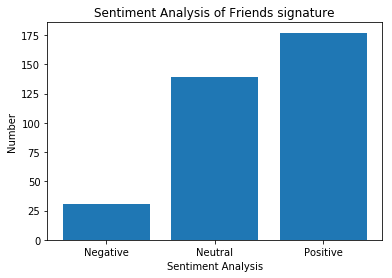

In [40]:
### 以下内容无需修改，直接运行即可
labels = [u'Negative',u'Neutral',u'Positive']
values = (negative,neutral,positive)
plt.xlabel(u'Sentiment Analysis')
plt.ylabel(u'Number')
plt.xticks(range(3),labels)
plt.bar(range(3), values)

plt.title('Sentiment Analysis of Friends signature')
plt.show()

In [41]:
### 退出登陆
itchat.logout()

<ItchatReturnValue: {'BaseResponse': {'ErrMsg': '请求成功', 'Ret': 0, 'RawMsg': 'logout successfully.'}}>

**注意: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出File -> Download as -> HTML (.html)把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。**